# Linear vs Polynomial Regression

In [1]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)


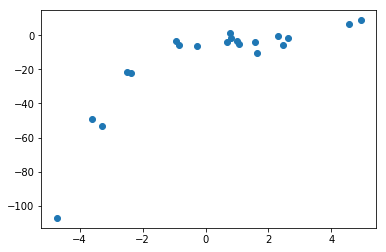

In [2]:
plt.scatter(x,y)
plt.show()

In [3]:
print(x)

[-3.29215704  0.79952837 -0.93621395 -4.7226796  -3.60267397  4.93183364
 -0.85026525  2.45407162  2.30965656  0.76820449  1.56786929 -2.36282052
 -0.28311318  1.63497495  0.6684103   0.99897702 -2.48223722  2.61547479
  1.0607969   4.56228722]


In [4]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [5]:
print(x)

[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]
 [ 1.56786929]
 [-2.36282052]
 [-0.28311318]
 [ 1.63497495]
 [ 0.6684103 ]
 [ 0.99897702]
 [-2.48223722]
 [ 2.61547479]
 [ 1.0607969 ]
 [ 4.56228722]]


In [6]:
model1 = LinearRegression()
model1.fit(x, y)
pred = model1.predict(x)

rmse = np.sqrt(mean_squared_error(y,pred))
r2 = r2_score(y,pred)
print(rmse)
print(r2)

15.9082425014
0.638675005483


In [14]:
print(model1.coef_)
print(model1.intercept_)
print(model1.fit_intercept)

[[ 8.29238755]]
[-16.79645067]
True


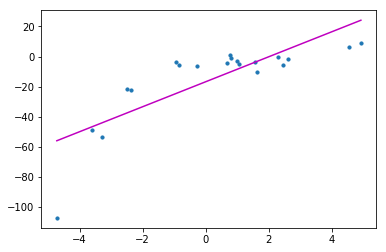

In [15]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,pred), key=sort_axis)
x, pred = zip(*sorted_zip)
plt.plot(x, pred, color='m')
plt.show()

In [16]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

23.2042510383
0.231243660713


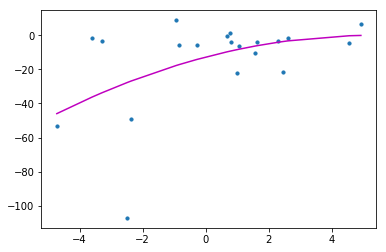

In [17]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [23]:
print(model.intercept_)
print(model.coef_)

[-12.75602135]
[[ 0.          4.85482296 -0.46076114]]


In [21]:
# The Y-Intercept Might Be Outside of the Observed Data